# OU Validation
This Notebook is supposed to validate the numerical simulation results of the OU processes.
To do so, the processes ACF is compared to its numerical solution.

## Setup

In [1]:
import os
os.chdir(os.environ['PYTHONPATH'])
print(os.getcwd())
from main_multiple_runs import R, T, t_interval, T_cycles, NoiseType
from plotting.plotting import plot_with_percentiles, plot_fwahh, fwahh
from pathlib import Path
from file_handling import load_ensemble
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

results = load_ensemble(Path('../results/params_symmetric_increasing_taus_300_700_0'))
steps = [0.1, 0.3, 0.5, 0.7, 0.9]
steps_len = len(steps)

/Users/tts/workspace/oldenburg/praktikum_jan_freund/code/src


In [2]:
res = results[0]
print(res['p'])
tau = res['p']['tau1']
median = res['acf_ensemble']['acf_ou1_median']

{'e': 0.5, 'tau1': 0.9, 'tau2': 0.9, 'noiseType': {'type': 'red noise', 'gamma1': 0.5, 'gamma2': 0.5}}


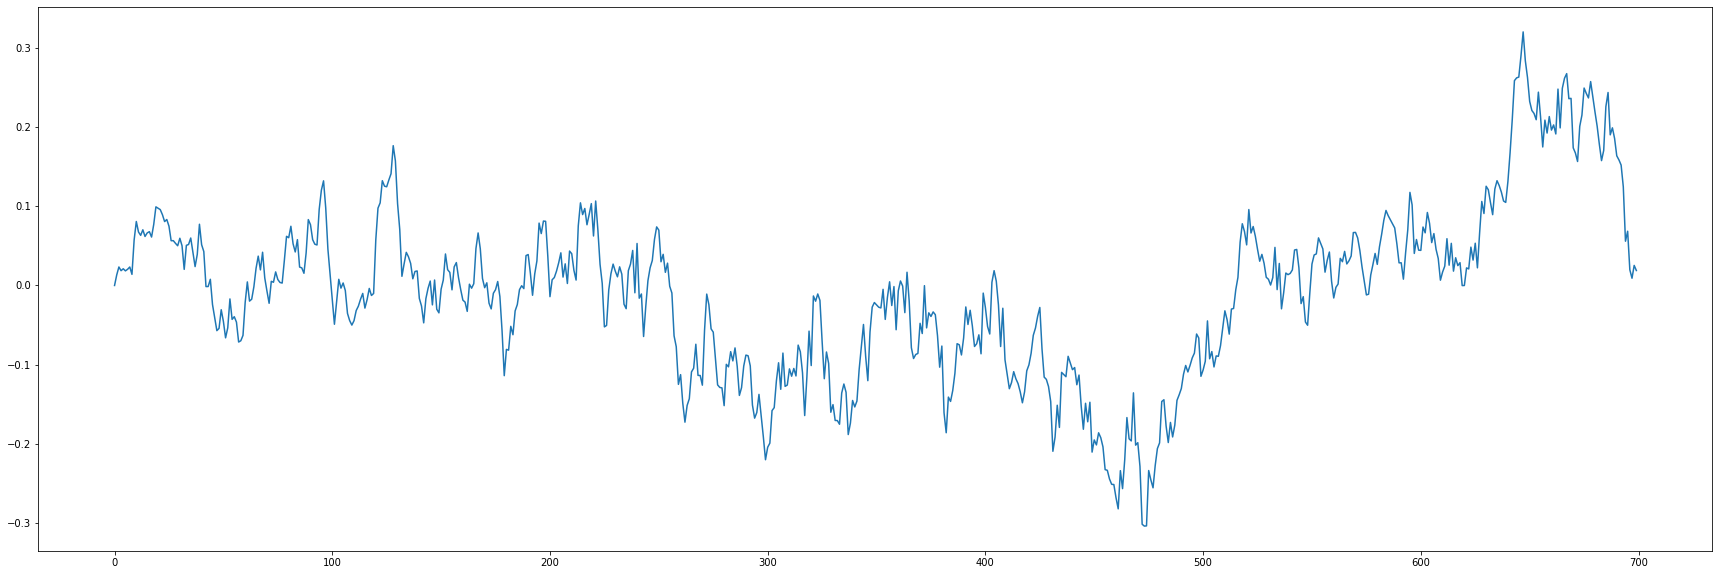

In [3]:
res['ensemble']['ou1_median'].plot()

## ACF Comparisson
### ACF from results vs. analytic ACF solution

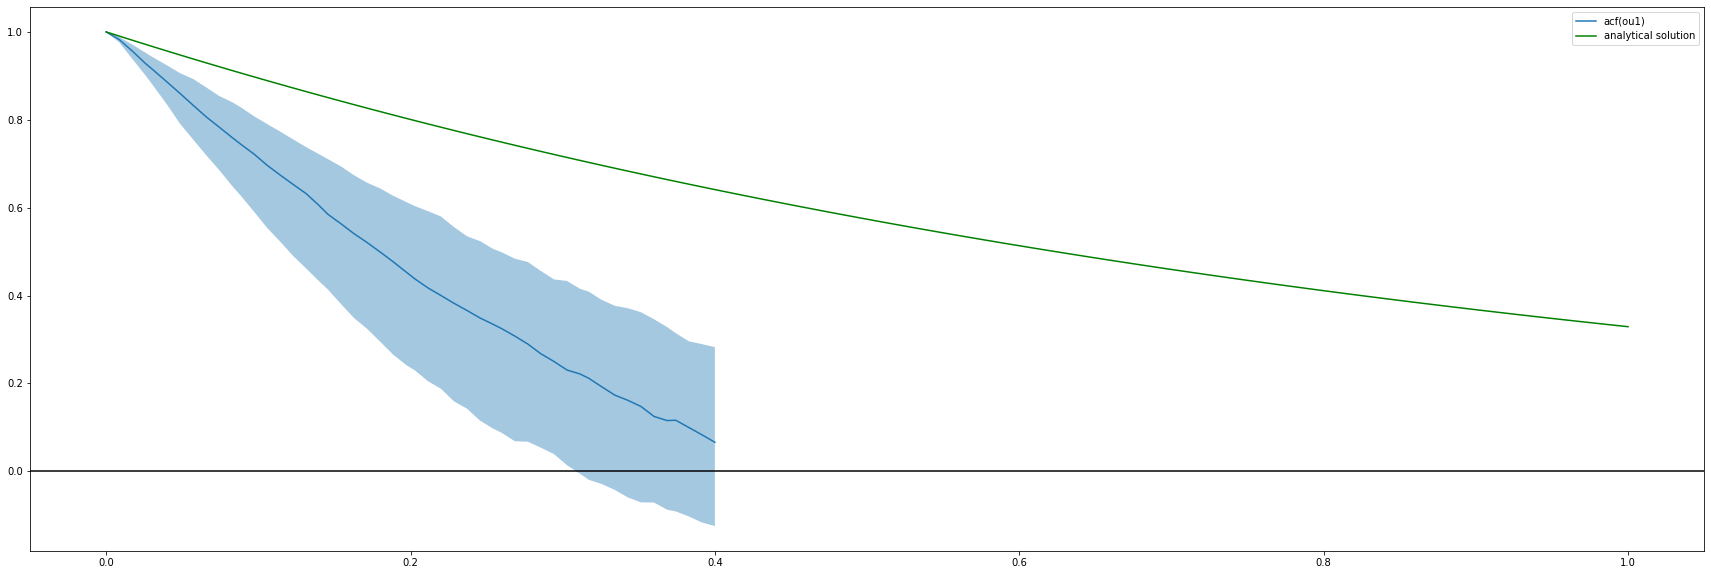

In [4]:
import pandas as pd
import math 
import numpy as np

fig, ax = plt.subplots(1,1)
plot_with_percentiles(res[f'acf_ensemble'], ax, f'acf(ou1)', prefix=f'acf_ou1_')

lags = np.linspace(0, 1, 100)
an_acf = pd.Series([math.e ** -(lag/tau) for lag in lags], index=lags)
an_acf.plot(color='green', label='analytical solution', ax=ax)

plt.legend()
ax.axhline(0, color='black')

### Manual ACF Calculation
#### Simulate OU process

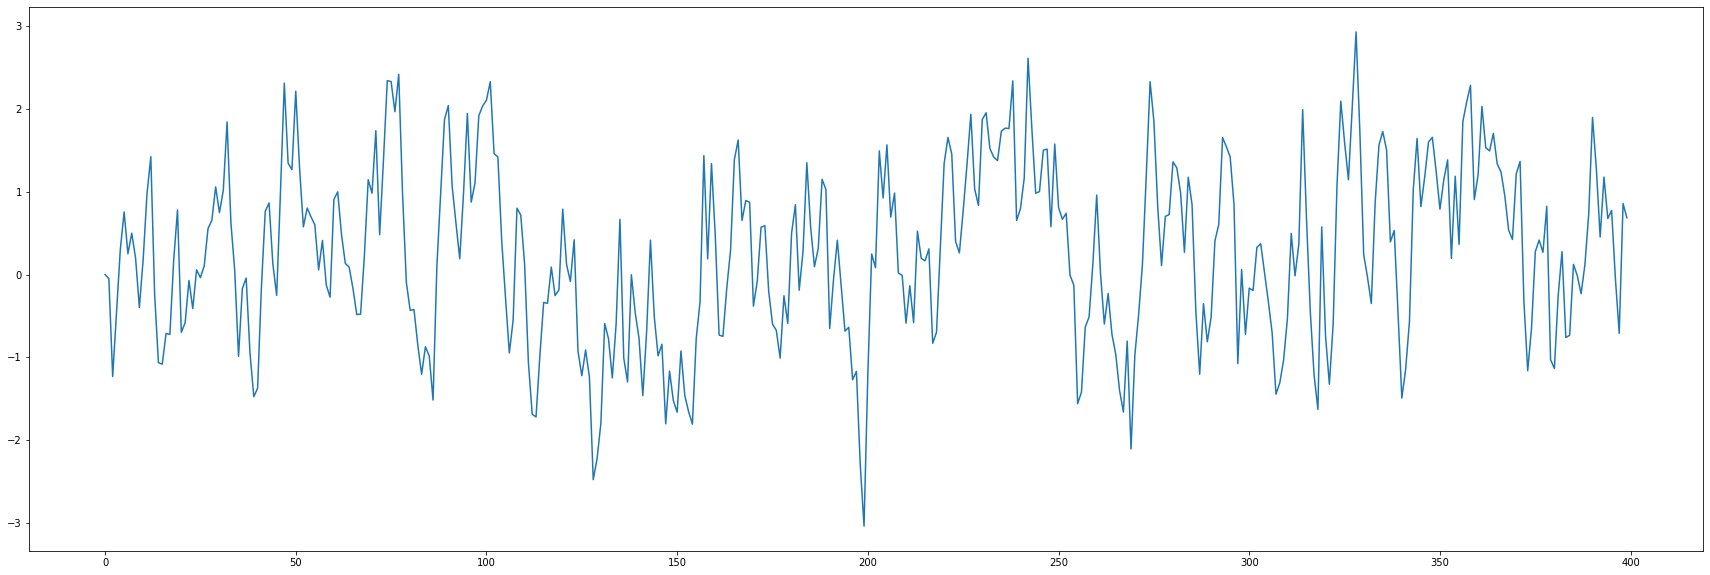

In [31]:
ensembles = 500
time = 2
R = 200
ic = 0
tau = 0.1
delta_t = time / R

ou = np.zeros([ensembles, R])

for i in range(0, ensembles):
    ou[i][0] = ic
    for j in range(1, R):
        x = ou[i][j-1]
        ou[i][j] = x - x/tau * delta_t + np.sqrt(2./tau) * np.random.normal(0, np.sqrt(delta_t))
        
pd.Series(ou[0]).plot()

#### Calculate ACF, plot and compare
Note how pandas autocov function requires a lag which specifies the discrete offset (resolution dependent)
while the analytical solution requires a lag in specifying the lag in time.

In [32]:
    print(tau)

0.1


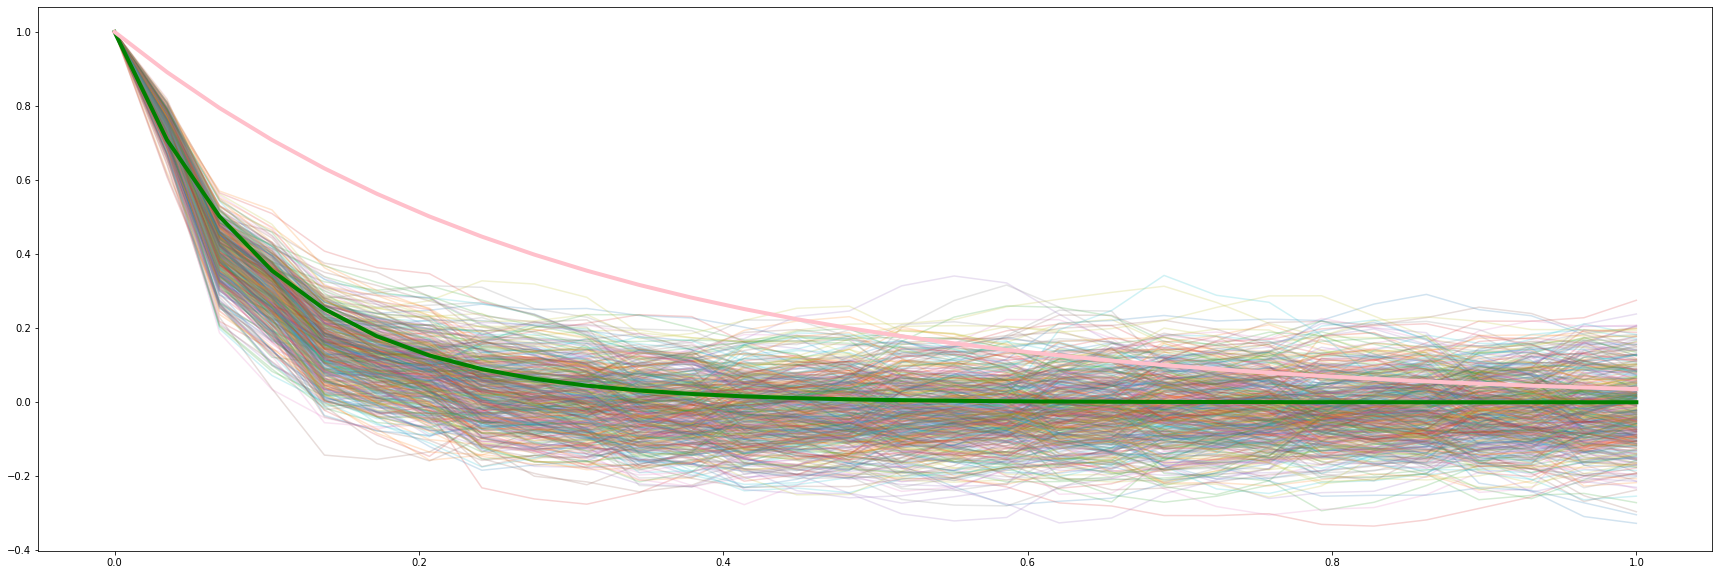

In [33]:
fig, ax = plt.subplots(1,1)
t_max_lag = 1
acf_res = 30
t_index = np.linspace(0, t_max_lag, acf_res)

index = np.linspace(0, t_max_lag*R/time, acf_res)
for i in range(0, ensembles):
    pd.Series([pd.Series(ou[i]).autocorr(round(lag)) for lag in index], index=t_index).plot(ax=ax, alpha=0.2)

pd.Series([math.e**(-lag/tau) for lag in t_index], index=t_index).plot(linewidth=4, color='green', ax=ax, label='analytical solution')
pd.Series([math.e**(-lag/0.3) for lag in t_index], index=t_index).plot(linewidth=4, color='pink', ax=ax, label='analytical solution 0.3')
